In [33]:
from typing import Dict
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scienceplots as _
import os

from checkpoints import CHECKPOINT_DIR

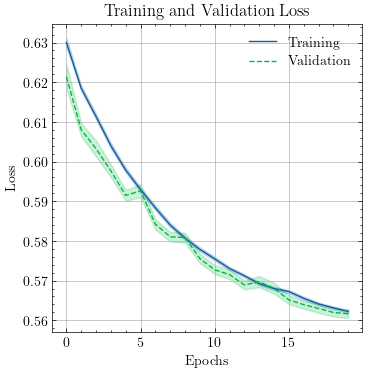

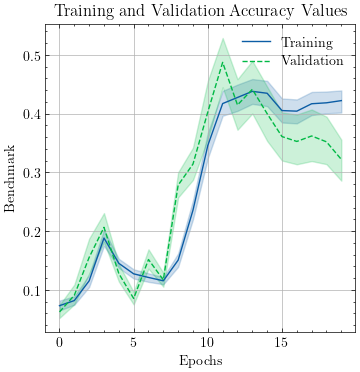

In [38]:
def visualize_checkpoint(checkpoint_name: str):
    plt.style.use(["science"])
    checkpoint = torch.load(Path(CHECKPOINT_DIR / checkpoint_name))

    # epoch = checkpoint["epoch"] + 1
    # start_epoch = checkpoint.get("start_epoch", 1)
    training_loss_history = checkpoint["training_loss_history"]
    training_metric_history = checkpoint["training_acc_history"]
    validation_loss_history = checkpoint["validation_loss_history"]
    validation_metric_history = checkpoint["validation_acc_history"]

    loss_figure = _create_figure(
        training_loss_history,
        validation_loss_history,
        "Loss",
        "Training and Validation Loss",
    )
    metric_figure = _create_figure(
        training_metric_history,
        validation_metric_history,
        "Benchmark",
        "Training and Validation Accuracy Values",
    )

    return loss_figure, metric_figure

def _create_figure(data_train, data_test, y_label, title):
    data_train = _prepare_data(data_train)
    data_test = _prepare_data(data_test)

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    axs.grid()
    sns.lineplot(
        data_train,
        x="epoch",
        y="value",
        ax=axs,
        linestyle="solid",
        label="Training",
    )
    sns.lineplot(
        data_test, x="epoch", y="value", ax=axs, linestyle="dashed", label="Validation"
    )
    axs.set_xlabel("Epochs")
    axs.set_ylabel(y_label)
    axs.set_title(title)
    return fig


def _prepare_data(data):
    d = [(i, e) for i, elems in enumerate(data) for e in elems]
    df = pd.DataFrame(d, columns=["epoch", "value"])
    return df


loss_fig, metric_fig = visualize_checkpoint('DUCKNet/ducknet_dice_128_20_lr_1e4.pt')


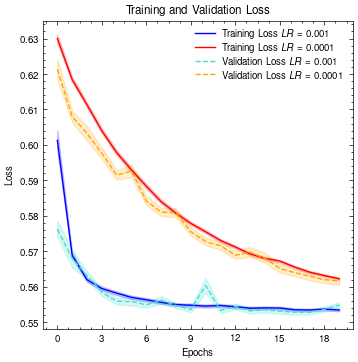

In [64]:
from matplotlib.ticker import MaxNLocator

def _create_figure_alt(data_train_1,data_train_2, data_test_1, data_test_2, y_label, title):
    data_train_1 = _prepare_data(data_train_1)
    data_test_1 = _prepare_data(data_test_1)
    data_train_2 = _prepare_data(data_train_2)
    data_test_2 = _prepare_data(data_test_2)

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    # axs.grid()
    sns.lineplot(
        data_train_1,
        x="epoch",
        y="value",
        ax=axs,
        linestyle="solid",
        color='blue',
        label=r'Training Loss $LR=0.001$',
    )
    sns.lineplot(
        data_train_2,
        x="epoch",
        y="value",
        ax=axs,
        linestyle="solid",
        color='red',
        label=r'Training Loss $LR=0.0001$',
    )
    sns.lineplot(
        data_test_1,
        x="epoch",
        y="value",
        ax=axs,
        linestyle="dashed",
        color='turquoise',
        label=r'Validation Loss $LR=0.001$',
    )
    sns.lineplot(
        data_test_2, 
        x="epoch", 
        y="value", 
        ax=axs, 
        linestyle="dashed", 
        color='orange',
        label=r'Validation Loss $LR=0.0001$'
    )
    axs.xaxis.set_major_locator(MaxNLocator(integer=True))
    axs.set_xlabel("Epochs")
    axs.set_ylabel(y_label)
    axs.set_title(title)
    return fig

def visualize_checkpoint_multi(checkpoint_name1, checkpoint_name2):
    plt.style.use(["science"])
    plt.style.use(["nature"])
    checkpoint1 = torch.load(Path(CHECKPOINT_DIR / checkpoint_name1))
    checkpoint2 = torch.load(Path(CHECKPOINT_DIR / checkpoint_name2))

    #for LR1e-3
    training_loss_history1 = checkpoint1["training_loss_history"]
    training_loss_history2 = checkpoint2["training_loss_history"]

    #for LR1e-4
    validation_loss_history1 = checkpoint1["validation_loss_history"]
    validation_loss_history2 = checkpoint2["validation_loss_history"]

    loss_figure = _create_figure_alt(
        training_loss_history1, training_loss_history2,
        validation_loss_history1, validation_loss_history2,
        "Loss",
        "Training and Validation Loss",
    )
    # val_loss_figure = _create_figure_alt(
    #     validation_loss_history1,
    #     validation_loss_history2,
    #     "Loss",
    #     "Validation Loss",
    # )

    return loss_figure


loss_fig = visualize_checkpoint_multi('DUCKNet/ducknet_dice_128_20.pt', 'DUCKNet/ducknet_dice_128_20_lr_1e4.pt')

In [65]:
from figures import FIGURES_DIR
FIGURES_CHECKPOINT_PATH = Path(FIGURES_DIR, "DUCKNet", "final_figures")
loss_fig.savefig(Path(FIGURES_CHECKPOINT_PATH, "ducknet_loss_learning_rates.svg"))
# val_fig.savefig(Path(FIGURES_CHECKPOINT_PATH, "ducknet_val_losses_learning_rates.svg"))